# OneHotEncoding

In [136]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder,MinMaxScaler,StandardScaler
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt


df = pd.DataFrame([
    ["Edward Remirez","Male",28,"Bachelors"],
    ["Arnarv Sharma","Male",23,"Masters"],
    ["Sophia Smith","Female",19,"High School"]],columns=["Name","Gender","Age","Degree"]
)

#oneHot Encoding
encoder_for_gender = OneHotEncoder().fit(df[["Gender"]])
encoder_for_gender.categories_
gender_values = encoder_for_gender.transform(df[["Gender"]])
gender_values.toarray()

df[["Gender_F","Gender_M"]] = gender_values.toarray()
df.head()



,Name,Gender,Age,Degree,Gender_F,Gender_M
0,Edward Remirez,Male,28,Bachelors,0.0,1.0
1,Arnarv Sharma,Male,23,Masters,0.0,1.0
2,Sophia Smith,Female,19,High School,1.0,0.0


# Ordinal Encoding


In [55]:
encoder_for_education = OrdinalEncoder(categories=[["Masters","Bachelors","High School","Doctoral"]]).fit(df[["Degree"]])
df[["Degree_encoded"]] = encoder_for_education.fit_transform(df[["Degree"]])
encoder_for_education.categories_
df
df.drop(columns=["Gender","Degree"])



,Name,Age,Gender_F,Gender_M,Degree_encoded
0,Edward Remirez,28,0.0,1.0,1.0
1,Arnarv Sharma,23,0.0,1.0,0.0
2,Sophia Smith,19,1.0,0.0,2.0


# Normalization

In [56]:
df0 = pd.DataFrame(
    {
        "Age":{0:28,1:23,2:19},
        "Gender_F":{0:0.0,1:0.0,2:1.0},
        "Gender_M":{0:1.0,1:1.0,2:0.0},
        "Degree_encoded":{0:0.0,1:2.0,2:1.0}
    }
)

df0

,Age,Gender_F,Gender_M,Degree_encoded
0,28,0.0,1.0,0.0
1,23,0.0,1.0,2.0
2,19,1.0,0.0,1.0


# Min-Max Scaling 

### transform each feature by compressing it down to scale where min in the dataset maps to zero and the max number in dataset maps to 1

In [57]:
df["MinMaxAge"] = MinMaxScaler().fit(df[["Age"]]).transform(df[["Age"]])
df[["Name","Age","MinMaxAge"]]

,Name,Age,MinMaxAge
0,Edward Remirez,28,1.000000
1,Arnarv Sharma,23,0.444444
2,Sophia Smith,19,0.000000


# Standard Scaling
### standardizes the feature by removing the mean and scaling to the unit variance

In [65]:
df[["Std_Age"]] = StandardScaler().fit_transform(df[["Age"]])
print(StandardScaler().fit(df[["Age"]]).mean_)
print(StandardScaler().fit(df[["Age"]]).scale_)

[23.33333333]
[3.68178701]


# Preprocessing Text
### Five Step NLP Pipeline
1. Segmentation
    - the process of finding the sentence boundaries
2. Tokenization
    - Breaks the sentence or sequence into individual componenetes or units called token
3. Stemming and Lemmatization
    - extracting the root word (work,working,worked)
4. Removing Stopwords
    - standard words that can be removed that will not cause error (i, me, my )
5. Prepare Word Vectors
    - converting text into a vectorized value (a numerical representation of the data)

In [75]:
# Tokenization 
word_tokenize("Let's learn machine learning")
tokens = [t.lower() for t in word_tokenize("This is a really long sentence that has some words")]
tokens

['this',
 'is',
 'a',
 'really',
 'long',
 'sentence',
 'that',
 'has',
 'some',
 'words']

In [94]:
# stemming 
eng_stopwords = stopwords.words('english')
stemmer = PorterStemmer()
for token in tokens:
    print(f"{token}, : {stemmer.stem(token)}")
    
stemmed_tokens = [stemmer.stem(token) for token in tokens]
removed_words = []
for token in stemmed_tokens:
    print(f"{token in stopwords.words('english')}")
    if token in stopwords.words("english"):
        removed_words.append(token)
        stemmed_tokens.remove(token)
        
removed_words
stemmed_tokens

this, : thi
is, : is
a, : a
really, : realli
long, : long
sentence, : sentenc
that, : that
has, : ha
some, : some
words, : word
False
True
False
False
False
True
True


['thi', 'a', 'realli', 'long', 'sentenc', 'ha', 'word']

In [135]:
# word vectors
# array of sentences
data = ["Let's learn Machine Learning Now","The Machines are Learning","It is Learning Time"]
# tokenizing each sentence making an array of arary of words
tokens = [word_tokenize(d) for d in data]
# making everything lowercase
tokens = [[word.lower() for word in line] for line in tokens]

# looping throw the array of array of strings
for i ,line in enumerate(tokens):
    #looping through the array of strings
    for word in line:
        print(i,line,word)
        if word in stopwords.words("english"):
            line.remove(word)
    tokens[i] = " ".join(line)
    
matrix = CountVectorizer()
x = matrix.fit_transform(tokens).toarray()

pd.DataFrame(x,columns=matrix.get_feature_names_out())


0 ['let', "'s", 'learn', 'machine', 'learning', 'now'] let
0 ['let', "'s", 'learn', 'machine', 'learning', 'now'] 's
0 ['let', "'s", 'learn', 'machine', 'learning', 'now'] learn
0 ['let', "'s", 'learn', 'machine', 'learning', 'now'] machine
0 ['let', "'s", 'learn', 'machine', 'learning', 'now'] learning
0 ['let', "'s", 'learn', 'machine', 'learning', 'now'] now
1 ['the', 'machines', 'are', 'learning'] the
1 ['machines', 'are', 'learning'] are
2 ['it', 'is', 'learning', 'time'] it
2 ['is', 'learning', 'time'] learning
2 ['is', 'learning', 'time'] time


,is,learn,learning,let,machine,machines,time
0,0,1,1,1,1,0,0
1,0,0,1,0,0,1,0
2,1,0,1,0,0,0,1


# Preprocessing Images


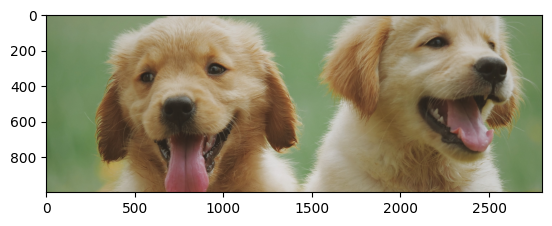

In [165]:
img = plt.imread("C:\\Users\\16175\\OneDrive\\Pictures\\puppy.jpg")
cropped_img = plt.imshow(img[1000:2000,1200:4000,])